In [1]:
import sys
import os
sys.path.append('/root/GanLuo/PullSum_MNIST/code/神经网络实验/MNIST最终实验')
import torch
import numpy as np 
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation_easy import *
from data_preparation_hard import *
from network_func import *
from search_parameter import *
import optuna

# ring+small heterogenity

分别测试节点为10和20的情况

n=15
 
PullSum: opt_lr = 6e-3*n = 

PullDiag: opt_lr = 2.5e-3

FRSD: opt_lr = 3e-3, opt_beta = 0.1(区别不大)

In [7]:
n=20
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=di_ring(n=n)#A=get_xinmeng_like_matrix(n=10,seed=99).T
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A,epochs=1000)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_data_node(n=n)

A的第二大特征值: 0.9528743933090136
A的beta: 0.9876933686892809
A的spectral gap: 0.012306631310719074
A的kappa: 2.000000000000011
S_A是: 1230.5535433881282 

1.9986e+00, 6.2915e+05


Training Progress: 100%|██████████| 200/200 [01:02<00:00,  3.19it/s, accuracy=90.0800000000%, epoch=200, loss=0.5472464874]


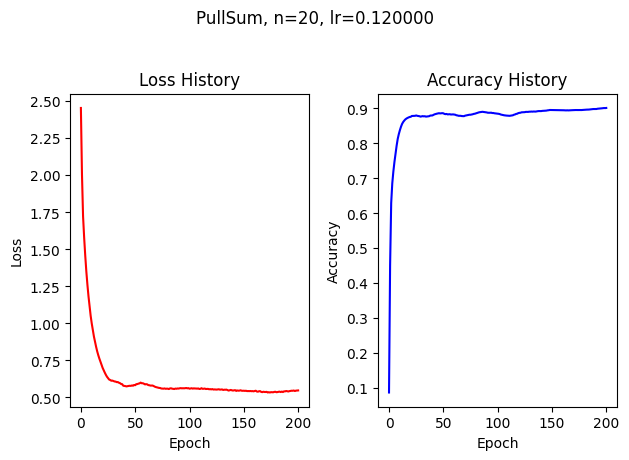

In [8]:
Sum_ll1, Sum_aa1= train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_2layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=200,
    lr=6e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

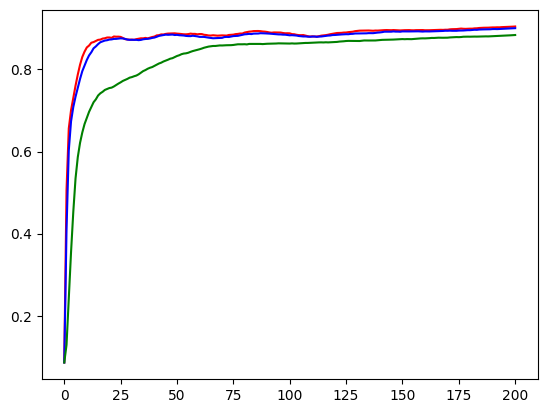

In [6]:
plt.plot(Sum_aa1,color='r')
plt.show()